# 9.3 Matplotlib Plotting: Displaying the results of EXERCISE 8.2.6 (Similar to EXERCISE 8.2.5 Part G) in a chart

###### 

###### General Guidelines (After going through all Quantnet Posts):
###### (1) 'Best to cull to a small number of tickers (i.e., 2-4), for both clarity of plots and size of notebooks.' APalley
###### (2) Exercise 3 is across tickers. Exercise 4 is using a couple of individual tickers. Exercise 5 is using your 'portfolio' table created at the end of level 8.
###### (3) Notebooks with Outputs are Good. No need to include data. 'TA does not necessarily need to be able to run the code for these levels'.

In [1]:
# No need to merge VWAP with original df.
# Use DF guidelines for this.
# Use Andy Zhang's Post: https://quantnet.com/threads/9-1-3-a-rolling-weighted-averages.46492/ as a basis. WHERE: Chart generated here is based on the AVERAGE DAILY RETURN of each stock in the S&P 500
# Version 1: groupby tickers (cross-section)
# Final Version: groupby dates (We get average return per date: time-series)

In [2]:
# Generate Data + Set Up Packages:
# Initialization: Load CSV and Import necessary Packages.

# (1) Packages
import pandas as pd
import yfinance as yf

# (2) Load two years stock data for every ticker in the current S&P 500
# dir(yf)
# Andy Zhang Quantnet Comment (Use read_html):
# REPLACE https://topforeignstocks.com/indices/components-of-the-sp-500-index/. Only has company Name
tableStocks = pd.read_html('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')
# len(tableStocks) (2 data frames)
# type(tableStocks) (List)

# Extract the PD:
table1 = tableStocks[0] # Get Table 1
tickList = table1['Symbol'] # Get Tickers from Table 1

# Alphabetical (Higher chances of having companies with data on top.)
tickList = sorted(tickList)
tickList

# Load Tickers (Third Attempt Code. Same as Before)
tickers = list(tickList) # Create Ticker List

# New Code to get data:
## Set Start Date/End Date
startDate = '2019-06-30'
endDate = '2021-06-30'

hist = yf.download(tickers, startDate, endDate, group_by='ticker')

## Change: Need set dates only because I will need to get date at the middle for 9_4.
# tickers = yf.Tickers(tickers) # yf.Tickers
# Pull Data (Same with Third Attempt Code. Don't do CSV anymore as file is too large to upload to Quantnet.)
# hist = tickers.history(group_by='ticker', period='2y') # Better.

hist

[*********************100%***********************]  505 of 505 completed

1 Failed download:
- BF.B: No data found for this date range, symbol may be delisted


FLT                                                  \
                  Open        High         Low       Close   Adj Close   
Date                                                                     
2019-07-01  283.769989  285.000000  280.079987  283.170013  283.170013   
2019-07-02  283.660004  287.000000  282.690002  286.019989  286.019989   
2019-07-03  286.510010  289.779999  286.329987  289.600006  289.600006   
2019-07-05  287.720001  291.790009  287.100006  291.769989  291.769989   
2019-07-08  291.029999  292.579987  290.029999  290.829987  290.829987   
...                ...         ...         ...         ...         ...   
2021-06-23  262.609985  262.970001  255.149994  255.199997  255.199997   
2021-06-24  257.570007  257.570007  254.800003  256.630005  256.630005   
2021-06-25  257.170013  263.989990  256.489990  262.339996  262.339996   
2021-06-28  262.989990  262.989990  253.240005  255.080002  255.080002   
2021-06-29  256.500000  256.890015  253.000000  253.550003  253.550003   

                           DVN                                   ...  \
             Volume       Open       High        Low      Close  ...   
Date                                                             ...   
2019-07-01   583200  29.120001  29.360001  28.650000  28.900000  ...   
2019-07-02   448500  28.730000  28.730000  27.440001  27.540001  ...   
2019-07-03   254300  27.750000  27.750000  27.209999  27.520000  ...   
2019-07-05   432000  27.440001  27.940001  27.350000  27.900000  ...   
2019-07-08   274700  27.709999  28.719999  27.650000  27.940001  ...   
...             ...        ...        ...        ...        ...  ...   
2021-06-23   949700  28.870001  29.910000  28.850000  29.100000  ...   
2021-06-24  1329900  29.110001  29.760000  28.639999  29.740000  ...   
2021-06-25  3339500  29.740000  29.990000  29.280001  29.760000  ...   
2021-06-28   660500  29.600000  29.680000  28.070000  28.410000  ...   
2021-06-29   763600  28.570000  28.879999  27.850000  28.020000  ...   

                  KLAC                                           RE  \
                   Low       Close   Adj Close   Volume        Open   
Date                                                                  
2019-07-01  120.169998  121.720001  117.643929  1447600  247.649994   
2019-07-02  118.769997  119.629997  115.623924  1447800  251.589996   
2019-07-03  118.419998  119.059998  115.073006  1195700  251.770004   
2019-07-05  116.330002  117.900002  113.951866   930100  254.539993   
2019-07-08  116.709999  117.349998  113.420280  1107300  253.839996   
...                ...         ...         ...      ...         ...   
2021-06-23  308.619995  310.859985  310.859985   656600  244.330002   
2021-06-24  312.279999  315.890015  315.890015   730700  247.470001   
2021-06-25  313.959991  316.260010  316.260010  3921200  253.649994   
2021-06-28  318.399994  322.260010  322.260010   861600  255.759995   
2021-06-29  321.540009  325.200012  325.200012   544800  252.800003   

                                                                    
                  High         Low       Close   Adj Close  Volume  
Date                                                                
2019-07-01  250.639999  247.279999  250.479996  237.834076  335200  
2019-07-02  252.979996  249.470001  251.139999  238.460770  221200  
2019-07-03  255.360001  251.770004  254.960007  242.087936  189700  
2019-07-05  255.089996  252.440002  254.509995  241.660629  172800  
2019-07-08  255.380005  253.229996  254.509995  241.660629  220200  
...                ...         ...         ...         ...     ...  
2021-06-23  246.770004  243.199997  245.779999  245.779999  407500  
2021-06-24  253.619995  246.850006  252.610001  252.610001  327500  
2021-06-25  256.760010  252.369995  256.239990  256.239990  512600  
2021-06-28  255.759995  250.529999  251.550003  251.550003  235800  
2021-06-29  253.919998  251.389999  253.000000  253.000000  361700  

[504 rows x

### a. Plot the volume-weighted average daily returns using a line chart.

In [3]:
# Create the array for the chart in a:
# (1) Stack the Table
hist1 = hist.stack(level=0).reset_index().rename(columns = {'level_1':'Ticker'}) # Stack is what will be used as column after Dates. If level = 1, each date, 5 metrics, then next date (change level_1 to 'metrics'). 
del hist1['Adj Close'] # Delete this extra column set

# Remove Na's
hist1 = hist1.dropna()
# hist1

# (2) Create Daily Returns Cross-Column.
hist1['Daily Return'] = (hist1.groupby('Ticker')['Close'].apply(pd.Series.pct_change))
# hist1.to_csv('sample.csv') # to check if values are correct. CORRECT.

# Drop na's again for stocks with daily return = na on certain days
hist1 = hist1.dropna()
hist1

# Reset Index
hist1 = hist1.reset_index()
del hist1['index'] # Delete this extra column set

# Final Data Table
hist1



,Date,Ticker,Close,High,Low,Open,Volume,Daily Return
0,2019-07-02,A,75.610001,76.180000,75.250000,75.849998,1877000.0,-0.002243
1,2019-07-02,AAL,32.189999,33.209999,32.029999,33.090000,4765100.0,-0.020985
2,2019-07-02,AAP,159.789993,160.490005,156.320007,157.000000,1394000.0,0.020436
3,2019-07-02,AAPL,50.682499,50.782501,50.340000,50.352501,67740800.0,0.005855
4,2019-07-02,ABBV,74.230003,74.250000,72.320000,73.199997,12862200.0,0.011308
...,...,...,...,...,...,...,...,...
252673,2021-06-29,YUM,115.559998,116.559998,115.419998,116.480003,1187000.0,-0.004737
252674,2021-06-29,ZBH,161.179993,164.050003,161.000000,163.690002,1100600.0,-0.015394
252675,2021-06-29,ZBRA,536.059998,536.780029,528.289978,529.690002,327800.0,0.016941
252676,2021-06-29,ZION,52.700001,54.419998,52.450001,53.939999,714900.0,-0.014032


In [4]:
# (3) Create Volume-Weighted Average Daily returns Cross-Section.
# Initialize
import numpy as np

# Create Array
# np.average(spgiDataTemp['Daily Return'], weights=(spgiDataTemp.Volume)/spgiDataTemp['Volume'].sum()) # Checked in the Excel File
# vwadChartData = hist1.groupby(by=['Ticker']).agg({'Volume-Weighted Average Daily Returns': (np.average(hist1['Daily Return'], weights=(hist1.Volume)/hist1['Volume'].sum()))}) # Can customize by column as well

vwadChartData = pd.DataFrame(dtype=float)
vwadChartData['Volume-Weighted Average Daily Returns'] = hist1.groupby(by=['Date']).apply(lambda arr: (np.average(arr['Daily Return'], weights=(arr.Volume)/arr['Volume'].sum()))) # Requires NO NA / Clean Data.
# vwadChartData['Volume-Weighted Average Daily Returns'] = hist1.groupby(by=['Ticker']).apply(lambda arr: (np.average(arr['Daily Return'], weights=(arr.Volume)/arr['Volume'].sum()))) # Requires NO NA / Clean Data. # Uses Per Ticker. Group by Date Instead
# vwadChartData['Volume-Weighted Average Daily Returns'] = hist1.groupby(by=['Ticker']).agg({'Daily Return': (np.average(hist1['Daily Return'], weights=(hist1.Volume)/hist1['Volume'].sum()))})
# vwadChartData['Volume-Weighted Average Daily Returns'] = hist1.groupby(by=['Ticker']).agg({'Daily Return': (np.average(hist1['Daily Return'], weights=(hist1.Volume)/hist1['Volume'].sum()))})

vwadChartData = vwadChartData.reset_index() # Cleaner chart if tickers not shown
vwadChartData.set_index('Date',drop=True,inplace=True)
vwadChartData

,Volume-Weighted Average Daily Returns
Date,
2019-07-02,-0.001498
2019-07-03,0.014155
2019-07-05,-0.001517
2019-07-08,-0.005174
2019-07-09,0.000755
...,...
2021-06-23,0.002335
2021-06-24,0.008254
2021-06-25,0.008174


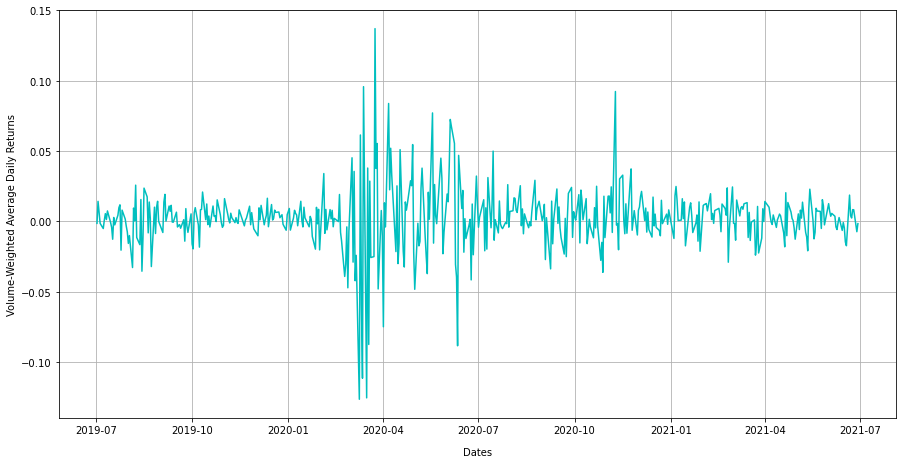

In [5]:
# Plot
import matplotlib.pyplot as plt # Similar to Matlab style

plt.figure(figsize=(15,7.5))
           
plt.plot(vwadChartData[['Volume-Weighted Average Daily Returns']], 'c-')
plt.ylabel('Volume-Weighted Average Daily Returns') # Set y label
plt.xlabel('Dates', labelpad=12) # x-axis with spacing, size change
plt.grid() # Set Grid

# Show Chart
plt.show() # Display Chart

### b. Plot the moving average daily return in a separate line chart. Try using different moving windows and a gaussian smoother to see what gives you the best line without losing too much granularity.

In [6]:
# Import Package for gauussian_filter
from scipy.ndimage import gaussian_filter

In [7]:
# Chart Set 1
# Add smoothened data to the dframe above
vwadChartData['SmoothedReturn'] = vwadChartData['Volume-Weighted Average Daily Returns'].rolling(10).mean()

# Add gaussian-smoothened data to the dframe above
vwadChartData['SmoothedReturnGaussian'] = gaussian_filter(vwadChartData['Volume-Weighted Average Daily Returns'], 5)

vwadChartData

,Volume-Weighted Average Daily Returns,SmoothedReturn,SmoothedReturnGaussian
Date,,,
2019-07-02,-0.001498,NaN,0.001761
2019-07-03,0.014155,NaN,0.001705
2019-07-05,-0.001517,NaN,0.001598
2019-07-08,-0.005174,NaN,0.001446
2019-07-09,0.000755,NaN,0.001261
...,...,...,...
2021-06-23,0.002335,-0.001778,0.000190
2021-06-24,0.008254,-0.000844,0.000489
2021-06-25,0.008174,-0.000291,0.000726


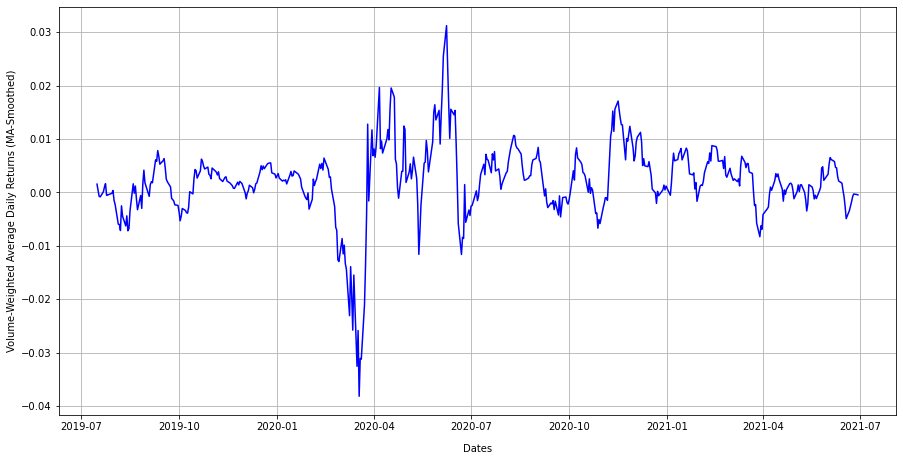

In [8]:
plt.figure(figsize=(15,7.5))
           
plt.plot(vwadChartData[['SmoothedReturn']], 'b-')
plt.ylabel('Volume-Weighted Average Daily Returns (MA-Smoothed)') # Set y label
plt.xlabel('Dates', labelpad=12) # x-axis with spacing, size change
plt.grid() # Set Grid

# Show Chart
plt.show() # Display Chart

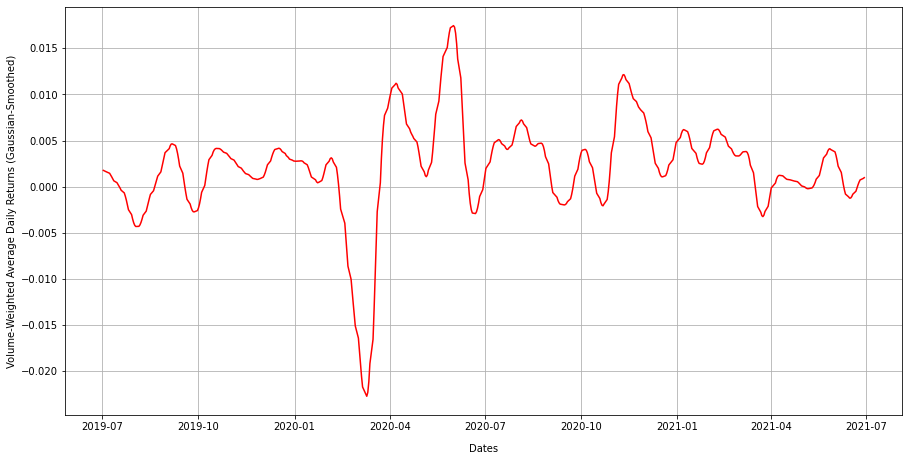

In [9]:
plt.figure(figsize=(15,7.5))
           
plt.plot(vwadChartData[['SmoothedReturnGaussian']], 'r-')
plt.ylabel('Volume-Weighted Average Daily Returns (Gaussian-Smoothed)') # Set y label
plt.xlabel('Dates', labelpad=12) # x-axis with spacing, size change
plt.grid() # Set Grid

# Show Chart
plt.show() # Display Chart

In [10]:
# Chart Set 2
# Add smoothened data to the dframe above
vwadChartData['SmoothedReturn'] = vwadChartData['Volume-Weighted Average Daily Returns'].rolling(20).mean()

# Add gaussian-smoothened data to the dframe above
vwadChartData['SmoothedReturnGaussian'] = gaussian_filter(vwadChartData['Volume-Weighted Average Daily Returns'], 10)

vwadChartData

,Volume-Weighted Average Daily Returns,SmoothedReturn,SmoothedReturnGaussian
Date,,,
2019-07-02,-0.001498,NaN,0.000611
2019-07-03,0.014155,NaN,0.000589
2019-07-05,-0.001517,NaN,0.000543
2019-07-08,-0.005174,NaN,0.000477
2019-07-09,0.000755,NaN,0.000389
...,...,...,...
2021-06-23,0.002335,0.001415,0.000204
2021-06-24,0.008254,0.001060,0.000175
2021-06-25,0.008174,0.000924,0.000154


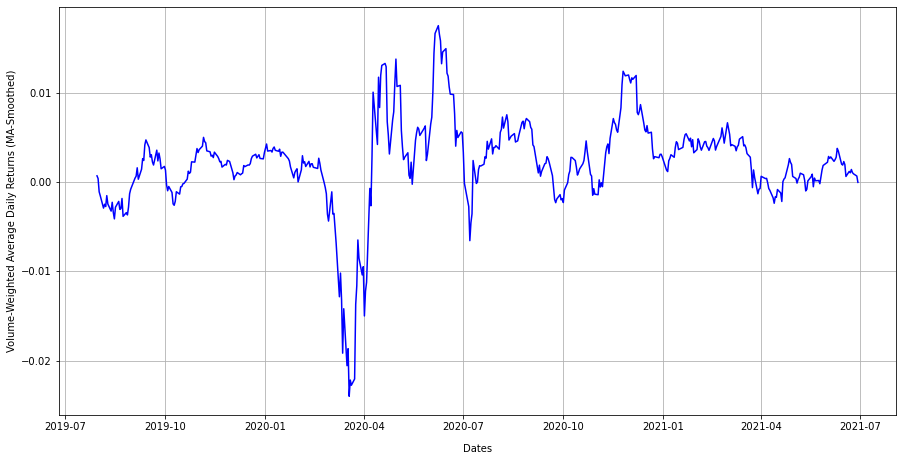

In [11]:
plt.figure(figsize=(15,7.5))
           
plt.plot(vwadChartData[['SmoothedReturn']], 'b-')
plt.ylabel('Volume-Weighted Average Daily Returns (MA-Smoothed)') # Set y label
plt.xlabel('Dates', labelpad=12) # x-axis with spacing, size change
plt.grid() # Set Grid

# Show Chart
plt.show() # Display Chart

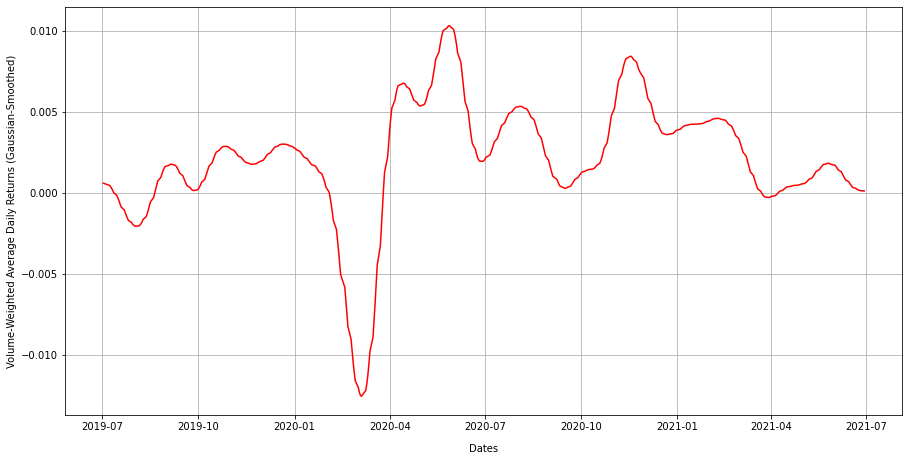

In [12]:
plt.figure(figsize=(15,7.5))
           
plt.plot(vwadChartData[['SmoothedReturnGaussian']], 'r-')
plt.ylabel('Volume-Weighted Average Daily Returns (Gaussian-Smoothed)') # Set y label
plt.xlabel('Dates', labelpad=12) # x-axis with spacing, size change
plt.grid() # Set Grid

# Show Chart
plt.show() # Display Chart

In [13]:
# Chart Set 3
# Add smoothened data to the dframe above
vwadChartData['SmoothedReturn'] = vwadChartData['Volume-Weighted Average Daily Returns'].rolling(30).mean()

# Add gaussian-smoothened data to the dframe above
vwadChartData['SmoothedReturnGaussian'] = gaussian_filter(vwadChartData['Volume-Weighted Average Daily Returns'], 15)

vwadChartData

,Volume-Weighted Average Daily Returns,SmoothedReturn,SmoothedReturnGaussian
Date,,,
2019-07-02,-0.001498,NaN,-0.000274
2019-07-03,0.014155,NaN,-0.000281
2019-07-05,-0.001517,NaN,-0.000295
2019-07-08,-0.005174,NaN,-0.000317
2019-07-09,0.000755,NaN,-0.000345
...,...,...,...
2021-06-23,0.002335,0.001264,0.000634
2021-06-24,0.008254,0.002239,0.000615
2021-06-25,0.008174,0.002219,0.000600


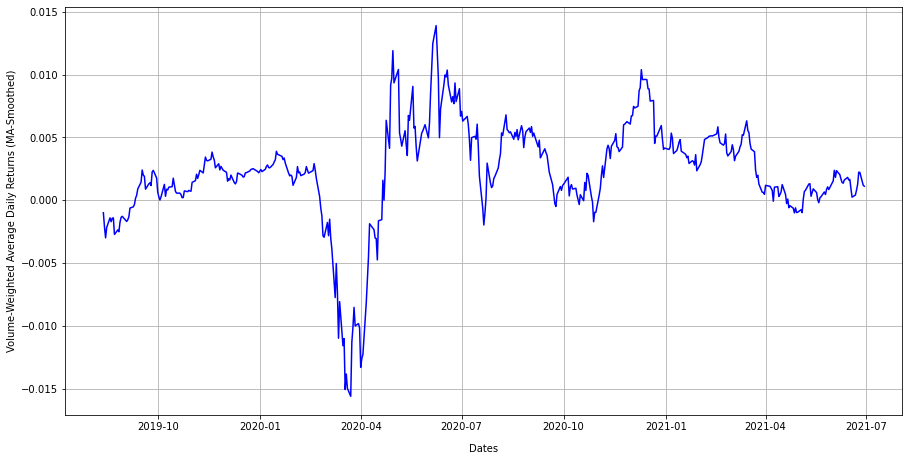

In [14]:
plt.figure(figsize=(15,7.5))
           
plt.plot(vwadChartData[['SmoothedReturn']], 'b-')
plt.ylabel('Volume-Weighted Average Daily Returns (MA-Smoothed)') # Set y label
plt.xlabel('Dates', labelpad=12) # x-axis with spacing, size change
plt.grid() # Set Grid

# Show Chart
plt.show() # Display Chart

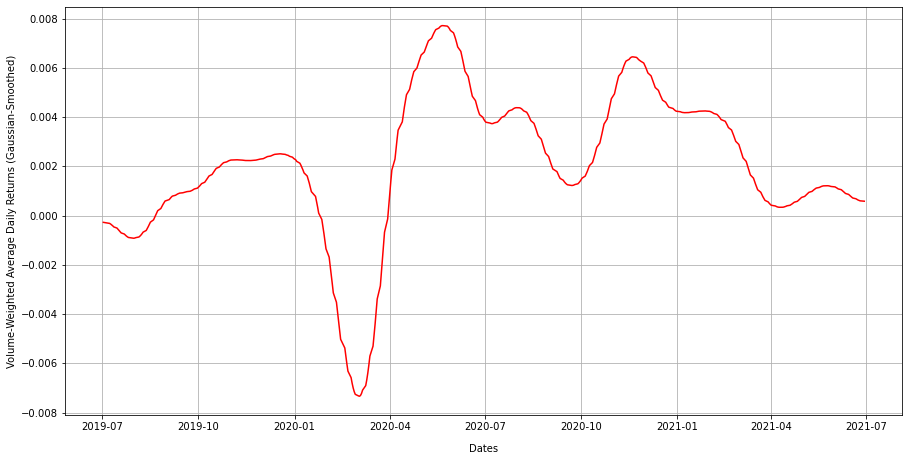

In [15]:
plt.figure(figsize=(15,7.5))
           
plt.plot(vwadChartData[['SmoothedReturnGaussian']], 'r-')
plt.ylabel('Volume-Weighted Average Daily Returns (Gaussian-Smoothed)') # Set y label
plt.xlabel('Dates', labelpad=12) # x-axis with spacing, size change
plt.grid() # Set Grid

# Show Chart
plt.show() # Display Chart

### c. Overlay the plots from a and b.

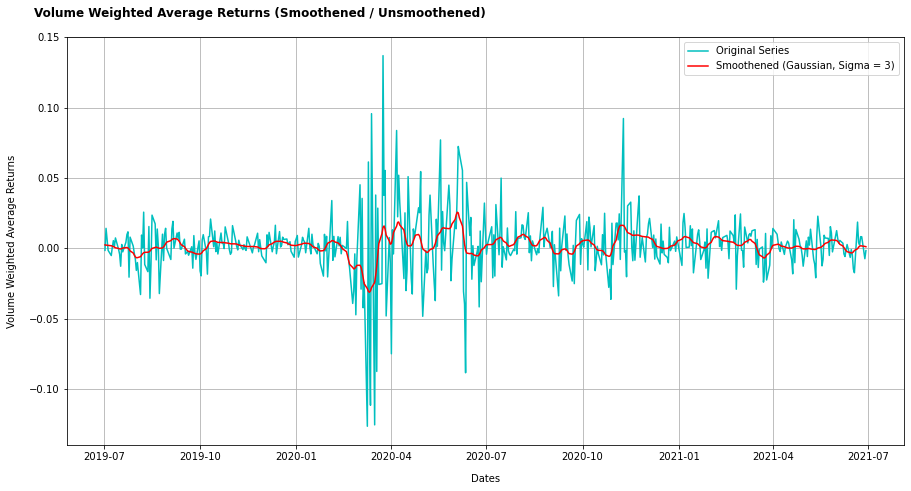

In [16]:
# Use Plot # to overlay with the original plot: Gaussian-Filter Chart 1 - Adequately Smoothened without Loss of Data.
## Better choice vs. sigma < 5 as these appear to be smoothened just right (leaves enough volatility). Perhaps sigma = 2 is also a good choice.
## Will use Sigma = 3. Just a bit smoother vs. sigma = 2.

# Add gaussian-smoothened data to the dframe above (Repeated Code from Chart Set 1)
vwadChartData['SmoothedReturnGaussian'] = gaussian_filter(vwadChartData['Volume-Weighted Average Daily Returns'], 3)

# Plot:

## Attempt 1
# fig, ax1 = plt.subplots(figsize=(15, 7.5)) # No need, plot both in same axis cause should fall under same y axis. Else distort Smoothed Return Gaussian when it should be overlayed aptly on the unsmoothed
# ax2.plot(vwadChartData['SmoothedReturnGaussian'], 'r-')
# ax2 = ax1.twinx()
# ax1.set_xlabel('Dates')
# ax1.set_ylabel('Volume-Weighted Average Daily Returns', color='c')
# ax2.set_ylabel('Volume-Weighted Average Daily Returns (Gaussian-Smoothed)', color='r')

# # Attempt 2:
plt.figure(figsize=(15, 7.5))

LineReturn = plt.plot(vwadChartData['Volume-Weighted Average Daily Returns'], 'c-')
LineReturnGauss = plt.plot(vwadChartData['SmoothedReturnGaussian'], 'r-')

# Note: pad/labelpad to adjust labels (title/axis) distance from chart
plt.title('Volume Weighted Average Returns (Smoothened / Unsmoothened)', horizontalalignment='right', fontsize='12', pad=20, fontweight ="bold") # Add Title
plt.legend(['Original Series', 'Smoothened (Gaussian, Sigma = 3)']) # Add Legend
plt.grid() # Add Grid
plt.xlabel('Dates', labelpad=12) # x-axis with spacing, size change
plt.ylabel('Volume Weighted Average Returns', fontsize='10', labelpad=12) # y-axis with spacing, size change

plt.show()

### d. Plot the moving average volume on the same plot.

In [17]:
# Prepare Data
# (1) Get Average Volume for each Stock
aveVolChartData = pd.DataFrame(dtype=float)
aveVolChartData['Average Volume'] = hist1.groupby(by=['Date']).apply(lambda arr: (np.average(arr['Volume']))) # Requires NO NA / Clean Data.
# aveVolChartData['Average Volume'] = hist1.groupby(by=['Ticker']).apply(lambda arr: (np.average(arr['Volume']))) # Requires NO NA / Clean Data. # Group by date is more meaningful
# vwadChartData['Volume-Weighted Average Daily Returns'] = hist1.groupby(by=['Ticker']).agg({'Daily Return': (np.average(hist1['Daily Return'], weights=(hist1.Volume)/hist1['Volume'].sum()))})
# vwadChartData['Volume-Weighted Average Daily Returns'] = hist1.groupby(by=['Ticker']).agg({'Daily Return': (np.average(hist1['Daily Return'], weights=(hist1.Volume)/hist1['Volume'].sum()))})

aveVolChartData = aveVolChartData.reset_index() # Cleaner chart if tickers not shown
aveVolChartData.set_index('Date',drop=True,inplace=True)
aveVolChartData

,Average Volume
Date,
2019-07-02,3.427391e+06
2019-07-03,2.347673e+06
2019-07-05,2.683973e+06
2019-07-08,3.228813e+06
2019-07-09,3.393211e+06
...,...
2021-06-23,3.539868e+06
2021-06-24,3.719529e+06
2021-06-25,5.492948e+06


In [18]:
# (2) Smoothen 1 using Gaussian Filter, Sigma = 5
aveVolChartData['SmoothedVolumeGaussian'] = gaussian_filter(aveVolChartData['Average Volume'], 5)

aveVolChartData

,Average Volume,SmoothedVolumeGaussian
Date,,
2019-07-02,3.427391e+06,3.172492e+06
2019-07-03,2.347673e+06,3.185987e+06
2019-07-05,2.683973e+06,3.212071e+06
2019-07-08,3.228813e+06,3.249212e+06
2019-07-09,3.393211e+06,3.295333e+06
...,...,...
2021-06-23,3.539868e+06,4.279991e+06
2021-06-24,3.719529e+06,4.265856e+06
2021-06-25,5.492948e+06,4.250667e+06


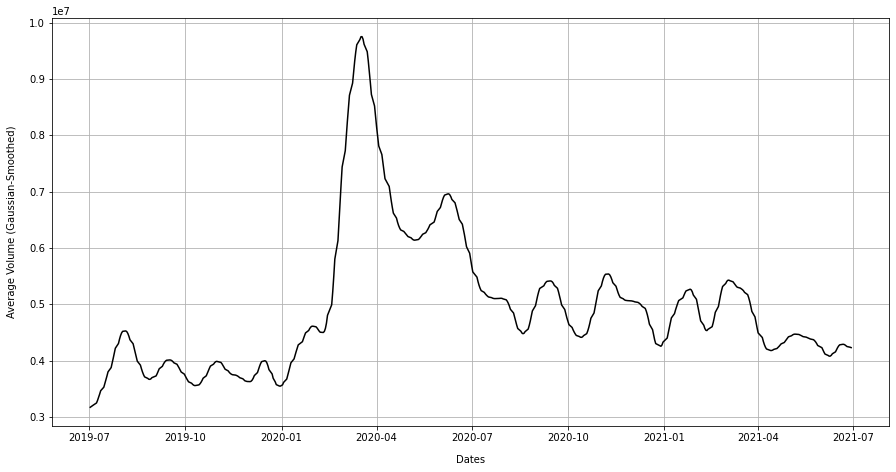

In [19]:
# Plot On its own:
plt.figure(figsize=(15,7.5))
           
plt.plot(aveVolChartData[['SmoothedVolumeGaussian']], 'k-')
plt.ylabel('Average Volume (Gaussian-Smoothed)', labelpad = 12) # Set y label
plt.xlabel('Dates', labelpad = 12) # Set x label
plt.grid() # Set Grid

# Show Chart
plt.show() # Display Chart

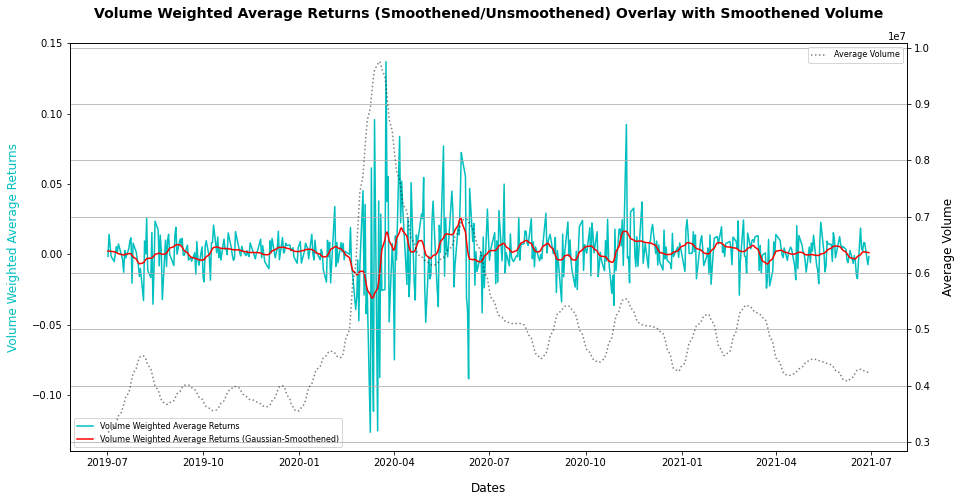

In [20]:
# Combine with c to get d:
# plt.figure(figsize=(15,7.5)) # Create Placeholder

fig, ax1 = plt.subplots(figsize=(15, 7.5)) # Create Placeholder
ax2 = ax1.twinx()

# Create Chart Lines:
# lineReturn = plt.plot(vwadChartData[['Volume-Weighted Average Daily Returns']], 'c-')
# lineReturnGauss = plt.plot(vwadChartData[['SmoothedReturnGaussian']], 'r-')
# lineVolumeGauss = plt.plot(aveVolChartData[['SmoothedVolumeGaussian']], 'k-')

# Package into Axes:
# attempt 1: ax1.plot(lineReturn, lineReturnGauss) # Fail, we plot df not plot objects
# key: ax1.plot(vwadChartData[['Volume-Weighted Average Daily Returns']], vwadChartData[['SmoothedReturnGaussian']], aveVolChartData[['SmoothedVolumeGaussian']])
ax1.plot(vwadChartData[['Volume-Weighted Average Daily Returns']], 'c-', vwadChartData[['SmoothedReturnGaussian']], 'r-')
ax2.plot(aveVolChartData[['SmoothedVolumeGaussian']], 'k:', alpha=0.5)

# Other Stuff:
plt.title('Volume Weighted Average Returns (Smoothened/Unsmoothened) Overlay with Smoothened Volume', horizontalalignment='center',fontsize='14',pad=25, fontweight ="bold")
plt.grid()

# Labels first before Legend
ax1.set_xlabel('Dates', fontsize='12', labelpad=14)
ax1.set_ylabel('Volume Weighted Average Returns', color='c', fontsize='12', labelpad=12)
ax2.set_ylabel('Average Volume', color='k', fontsize='12', labelpad=12)

# Legend:
ax1.legend(['Volume Weighted Average Returns','Volume Weighted Average Returns (Gaussian-Smoothened)'], loc=3, fontsize='8') # cyan, red
ax2.legend(['Average Volume'], loc=1, fontsize='8') # black, red

# plt.xlabel('Dates', fontsize='12', labelpad=12) # x-axis with spacing, size change
# plt.ylabel('Volume Weighted Average Returns', fontsize='12', labelpad=12) # y-axis with spacing, size change

# Show Chart
plt.show() # Display Chart